In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data_from(file_dir):
    df = pd.read_csv(file_dir)
    x = np.array([[1, feature] for feature in df['x'][:]])  # Adding intercept term with data
    y = np.array(df['y'][:])

    return x, y


def visualize_data(features, labels):
    plt.plot(features[:, 1], labels[:], 'rx')
    plt.xlabel("Population of city in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()


def compute_cost(features, labels, parameters):
    m = labels.size
    h_x = np.dot(features, parameters)
    cost = (1 / (2 * m)) * sum(np.square(h_x - labels))

    return cost


def gradient_descent(features, labels, epochs, learning_rate):
    J = []
    m = labels.size
    thetas = np.random.random(size=features[0, :].shape)
    # vectorized form of gradient descent
    for _ in range(epochs):
        thetas[0] -= (learning_rate / m) * sum((np.dot(features, thetas) - labels) * features[:, 0])
        thetas[1] -= (learning_rate / m) * sum((np.dot(features, thetas) - labels) * features[:, 1])
        J.append(compute_cost(features=features, labels=labels, parameters=thetas))

    return thetas, J


def plot_data_with_hypothesis(features, labels, thetas):
    plt.plot(features[:, 1], labels[:], 'rx')
    plt.xlabel("Population of city in 10,000s")
    plt.ylabel("Profit in $10,000s")

    plt.plot(features[:, 1], np.dot(features, thetas), '-')

    plt.legend(['Data', 'Linear regression'])
    plt.show()


def visualize_training_error(error):
    plt.plot(error)
    plt.title('Training Error')
    plt.show()


def surface_contour_plot(features, labels, thetas):
    # grid over which we will calculate J
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)

    # initializing J's to a matrix of 0's
    J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

    # Fill out J_vals
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            J_vals[i, j] = compute_cost(features, labels, [theta0, theta1])

    # transposing J_vals before calling surf, or else the axes will be flipped
    J_vals = J_vals.T

    # surface plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('Surface')

    # contour plot
    # Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
    ax = plt.subplot(122)
    plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.plot(thetas[0], thetas[1], 'ro', ms=10, lw=2)
    plt.title('Contour, showing minimum')
    plt.show()

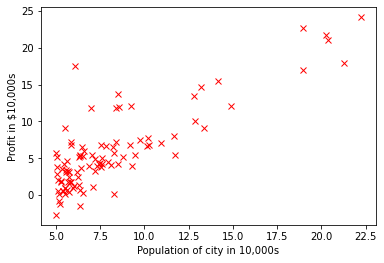

with theta=[0, 0],  Computed cost=32.072733877455654,   Expected cost=32.07
with theta=[-1, 2],  Computed cost=54.24245508201238,   Expected cost=54.24

Theta found by Gradient Descent: [-3.60289021  1.16366254],   theta expected: [-3.6303, 1.1664]


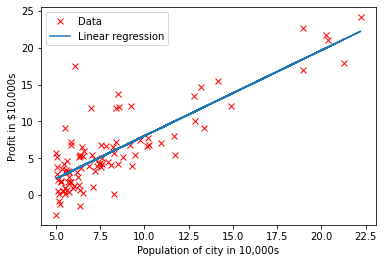

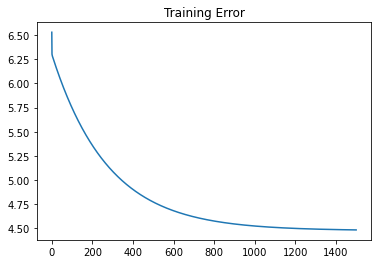

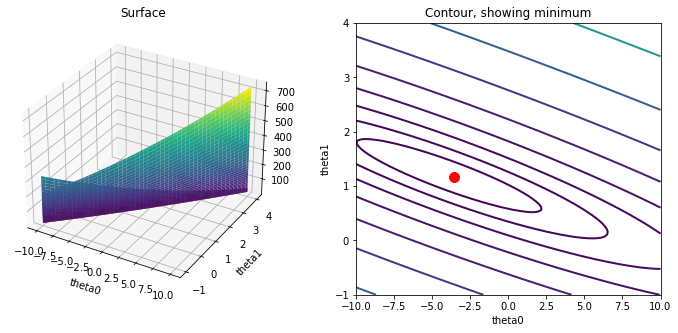

For population 35,000, profit prediction= $4699.286819025872
For population 70,000, profit prediction= $45427.4757047549


In [3]:
def main():
    x, y = get_data_from(file_dir='./ex1data1.txt')
    visualize_data(features=x, labels=y)

    # Testing compute_cost function with theta=[0, 0]
    cost1 = compute_cost(features=x, labels=y, parameters=[0, 0])
    print(f"with theta=[0, 0],  Computed cost={cost1},   Expected cost=32.07")

    # Testing compute_cost function with theta=[0, 0]
    cost2 = compute_cost(features=x, labels=y, parameters=[-1, 2])
    print(f"with theta=[-1, 2],  Computed cost={cost2},   Expected cost=54.24")

    # Training Gradient descent
    alpha = 0.01
    epochs = 1500
    optimized_thetas, J = gradient_descent(features=x, labels=y, epochs=epochs, learning_rate=alpha)

    print("\nTheta found by Gradient Descent: {},   theta expected: [-3.6303, 1.1664]".format(optimized_thetas))

    plot_data_with_hypothesis(x, y, optimized_thetas)
    visualize_training_error(error=J)
    surface_contour_plot(features=x, labels=y, thetas=optimized_thetas)

    predict1 = np.dot([1, 3.5], optimized_thetas)
    predict2 = np.dot([1, 7], optimized_thetas)
    print(f"For population 35,000, profit prediction= ${predict1 * 10000}")
    print(f"For population 70,000, profit prediction= ${predict2 * 10000}")


if __name__ == '__main__':
    main()
